In [2]:
library(kBET)
library(dplyr)
library(ggplot2)
ulimit::memory_limit(6000)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




soft hard 
6000  Inf

In [3]:
#change to correct directory
dir = '/home/groups/graylab_share/OMERO.rdsStore/engje/Data/cycIF_ValidationStudies/cycIF_Validation/Data/filtered_data'
setwd(dir)

In [5]:
#data files to process
file_list = c(#'20201207_JE-TMA-41-43-62_SampledMeanIntensity_raw_bg-quant.csv',
 #'20201208_JE-TMA-41-43-62_SampledMeanIntensity_raw_bg-quant.csv',
 #'20201209_JE-TMA-41-43-62_SampledMeanIntensity_raw_bg-quant.csv',
 #'20201207_JE-TMA-41-43-62_SampledMeanIntensity_raw_restore.csv',
 #'20201208_JE-TMA-41-43-62_SampledMeanIntensity_raw_restore.csv',
 #'20201209_JE-TMA-41-43-62_SampledMeanIntensity_raw_restore.csv'
 #'20201208_JE-TMA-41-43-62_SampledMeanIntensity_raw_combat.csv',
 #'20201208_JE-TMA-41-43-62_SampledMeanIntensity_log2_combat.csv',
 #'20201208_JE-TMA-41-43-62_SampledMeanIntensity_raw_regress_out.csv',
 #'20201208_JE-TMA-41-43-62_SampledMeanIntensity_log2_regress_out.csv'
 #'20201208_JE-TMA-41-43-62_SampledMeanIntensity_raw_restore_regress_out.csv',
 #'20201208_JE-TMA-41-43-62_SampledMeanIntensity_raw_restore_combat.csv',
 #'20201209_JE-TMA-41-43-62_SampledMeanIntensity_raw_restore_regress_out.csv',
 #'20201209_JE-TMA-41-43-62_SampledMeanIntensity_raw_restore_combat.csv',
#'20201207_JE-TMA-41-43-62_SampledMeanIntensity_raw_bg-quant.csv',
 #'20201208_JE-TMA-41-43-62_SampledMeanIntensity_raw_bg-quant.csv',
 #'20201209_JE-TMA-41-43-62_SampledMeanIntensity_raw_bg-quant.csv'
 #'20201207_JE-TMA-41-43-62_SampledMeanIntensity_raw_restore.csv',
 #'20201208_JE-TMA-41-43-62_SampledMeanIntensity_raw_restore.csv',
 #'20201209_JE-TMA-41-43-62_SampledMeanIntensity_raw_restore.csv'
 #'20201207_JE-TMA-41-43-62_SampledMeanIntensity_raw_combat.csv',
 #'20201207_JE-TMA-41-43-62_SampledMeanIntensity_log2_combat.csv',
 #'20201207_JE-TMA-41-43-62_SampledMeanIntensity_raw_regress_out.csv',
 #'20201207_JE-TMA-41-43-62_SampledMeanIntensity_log2_regress_out.csv',
 #'20201209_JE-TMA-41-43-62_SampledMeanIntensity_raw_combat.csv',
 #'20201209_JE-TMA-41-43-62_SampledMeanIntensity_log2_combat.csv',
 #'20201209_JE-TMA-41-43-62_SampledMeanIntensity_raw_regress_out.csv',
 #'20201209_JE-TMA-41-43-62_SampledMeanIntensity_log2_regress_out.csv'
 #'20201207_JE-TMA-41-43-62_SampledMeanIntensity_raw_restore_regress_out.csv',
 #'20201207_JE-TMA-41-43-62_SampledMeanIntensity_raw_restore_combat.csv'
 '20201207_JE-TMA-41-43-62_SampledMeanIntensity_restore_scale.csv',
 '20201208_JE-TMA-41-43-62_SampledMeanIntensity_restore_scale.csv',
 '20201209_JE-TMA-41-43-62_SampledMeanIntensity_restore_scale.csv'
 )

[1] "20201207_JE-TMA-41-43-62_SampledMeanIntensity_restore_scale.csv"
[1] "20201208_JE-TMA-41-43-62_SampledMeanIntensity_restore_scale.csv"


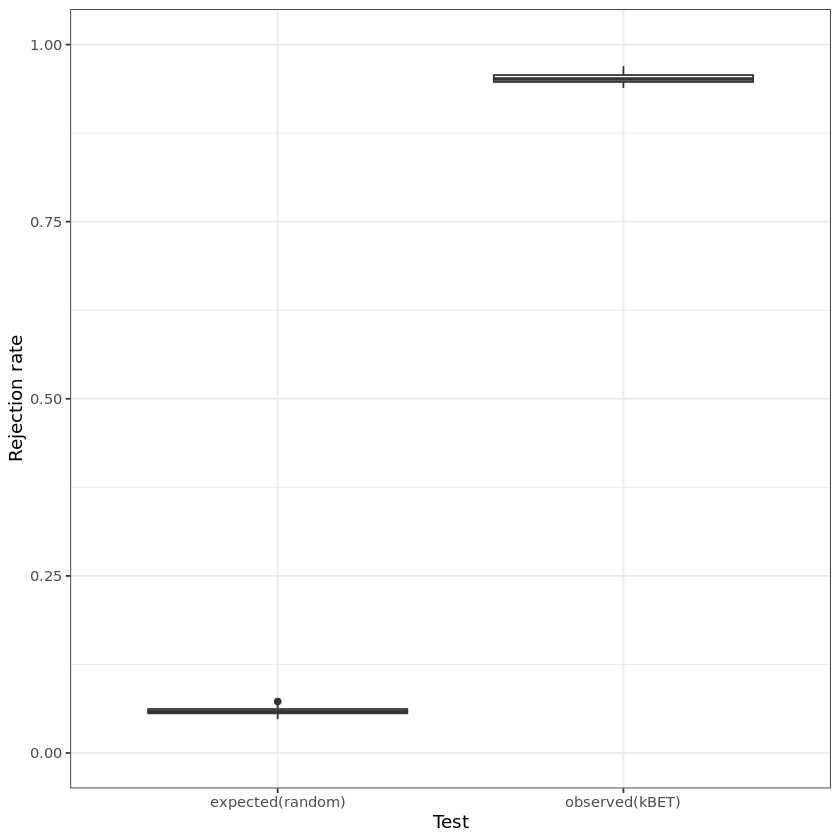

[1] "20201209_JE-TMA-41-43-62_SampledMeanIntensity_restore_scale.csv"


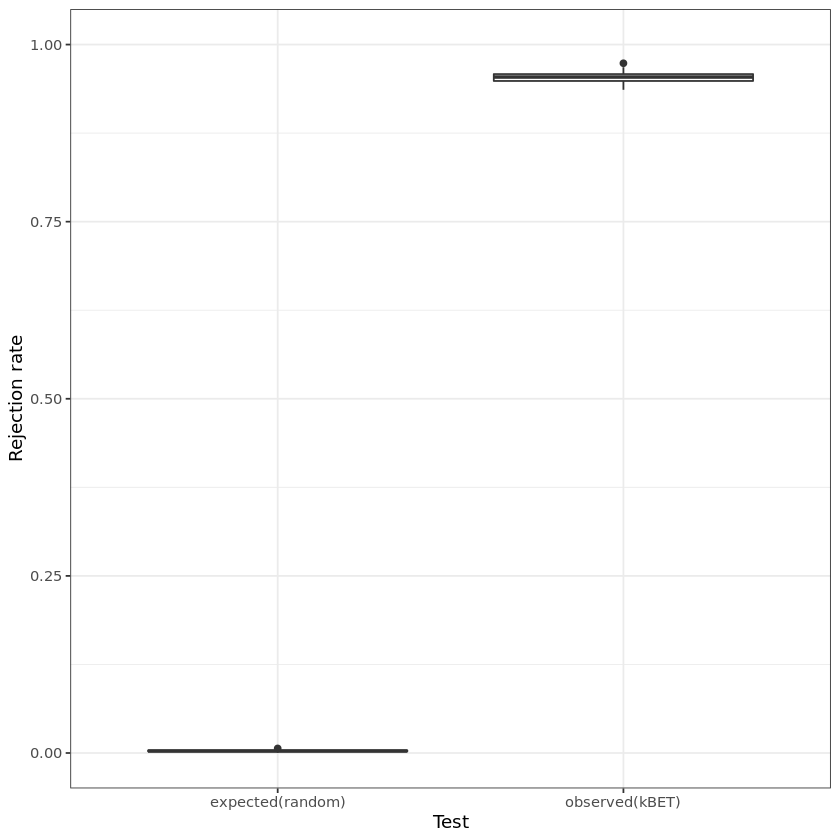

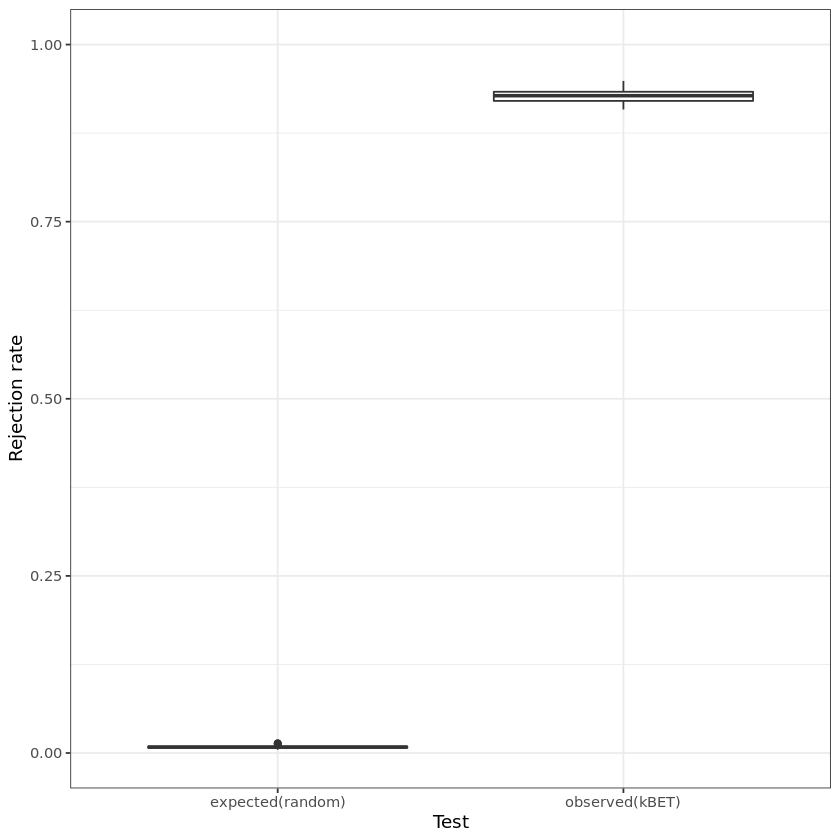

In [6]:
for (file in file_list){
print(file)
data  <- read.csv(file)
strs <- strsplit(file, "Intensity_")
strs2 <- strsplit(file, "_JE-TMA")
data_test <- data %>% select(which(sapply(.,is.numeric)))
avector <- data[['batch']]
start_time <- Sys.time()
batch.estimate <- kBET(data_test, avector)
end_time <- Sys.time()
end_time - start_time
batch.estimate$summary
write.csv(batch.estimate$summary,sprintf("%s_JE-TMA-41-43-62_kbet_%s", strs2[[1]][1] ,strs[[1]][2]))
    }

In [ ]:
plot.data <- data.frame(class=rep(c('observed', 'expected'), 
                                  each=length(batch.estimate$stats$kBET.observed)), 
                        data =  c(batch.estimate$stats$kBET.observed,
                                  batch.estimate$stats$kBET.expected))
g <- ggplot(plot.data, aes(class, data)) + geom_boxplot() + 
     labs(x='Test', y='Rejection rate',title='kBET test results') +
     theme_bw() +  
     scale_y_continuous(limits=c(0,1))

In [ ]:
g